# import 및 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np

## 난수 발생을 위한 패키지
import random
## 그래프 표현을 위해 필요한 패키지
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# 한글 호환 문제
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rcParams['font.family'] = 'NanumBarunGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.font_manager as fm

!sudo apt-get install -y fonts-nanum

# 폰트 캐시 재설정
!sudo fc-cache -fv

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/뽀로로드/data(아파트시세_코랩가공)/onehotcoding(연식 평균 컬럼 추가).csv', encoding='cp949')
df.set_index('동', drop=True, inplace=True)
df.head()

,연식,동별 평균 연식,구별 평균 연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,...,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,Type_OneHot_Encoder_단독다가구,Type_OneHot_Encoder_아파트,Type_OneHot_Encoder_연립다세대,Type_OneHot_Encoder_오피스텔,평당전세가
동,,,,,,,,,,,,,,,,,,,,,
원효로2가,30.0,13.940659,20.914235,6.0,20200810.0,2020,8,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,748.978665
원효로2가,12.0,13.940659,20.914235,3.0,20200921.0,2020,9,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1396.825397
원효로2가,1.0,13.940659,20.914235,5.0,20200225.0,2020,2,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2997.981157
원효로2가,1.0,13.940659,20.914235,4.0,20200210.0,2020,2,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3031.062124
원효로2가,2.0,13.940659,20.914235,5.0,20200111.0,2020,1,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1902.358898


# 오피스텔

## 건물용도 필터링

In [ ]:
df_officetel = df.loc[df['Type_OneHot_Encoder_오피스텔']==1]
df_officetel.drop(['Type_OneHot_Encoder_단독다가구', 'Type_OneHot_Encoder_아파트', 'Type_OneHot_Encoder_연립다세대', 'Type_OneHot_Encoder_오피스텔'], axis=1, inplace=True)
df_officetel

,연식,동별 평균 연식,구별 평균 연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,...,Gu_OneHot_Encoder_성북구,Gu_OneHot_Encoder_송파구,Gu_OneHot_Encoder_양천구,Gu_OneHot_Encoder_영등포구,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,평당전세가
동,,,,,,,,,,,,,,,,,,,,,
원효로2가,30.0,13.940659,20.914235,6.0,20200810.0,2020,8,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,748.978665
원효로2가,31.0,13.940659,20.914235,6.0,20210317.0,2021,3,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1355.923992
원효로2가,31.0,13.940659,20.914235,6.0,20210406.0,2021,4,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1846.153846
원효로2가,32.0,13.940659,20.914235,8.0,20220330.0,2022,3,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2307.692308
원효로2가,0.0,13.940659,20.914235,10.0,20220705.0,2022,7,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3878.653113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
번동,21.0,22.724690,19.539600,3.0,20221118.0,2022,11,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1479.713415
번동,0.0,22.724690,19.539600,19.0,20221126.0,2022,11,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4506.504292
번동,18.0,22.724690,19.539600,8.0,20221203.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2057.143785


## LGBM

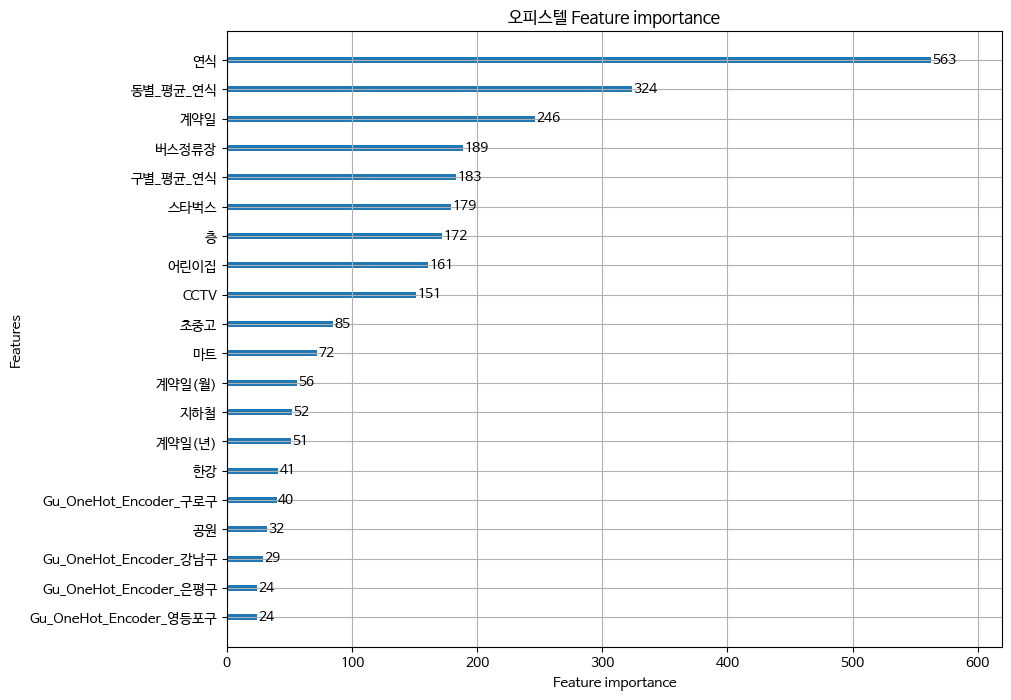

In [ ]:
from lightgbm import LGBMRegressor
import lightgbm as lgb

X_features = df_officetel.iloc[:, :-1]
y_label = df_officetel.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

model = LGBMRegressor(max_depth=10, random_state=11, verbose=-1)
model.fit(X_train, y_train)

lgb.plot_importance(model, figsize=(10, 8), max_num_features=20, title='오피스텔 Feature importance')
plt.show()

Mean Absolute Error: 287.1928417110785
Mean Squared Error: 197832.96018549826
Root Mean Squared Error: 444.7841725887942
Mean Squared Log Error: 0.03359905104419931
R Squared: 0.6747388221632424
Mean Absolute Percentage Error: 13.37814835846331
Mean Percentage Error: -3.821325457981851
              실제값          예측값
동                             
가락동   1913.198896  1983.199528
가리봉동  1523.156946  1704.330668
가산동   2515.949944  2497.171706
가양동   2432.400931  2401.060393
갈월동   1905.860095  2112.160437
...           ...          ...
회기동   2028.538796  2174.100840
효제동   2919.192027  3068.399883
후암동   1487.783595  1679.762354
휘경동   3055.908842  3020.206938
흥인동   2787.639655  2626.181055

[260 rows x 2 columns]


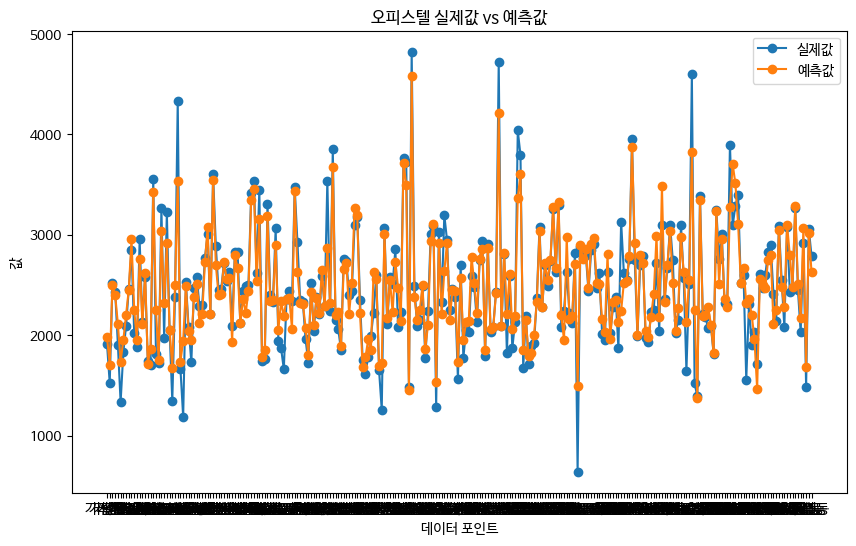

In [ ]:
# LightGBM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

# 학습된 모델을 사용하여 예측
y_pred = model.predict(X_test)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'R Squared: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 예측값과 실제값 비교하는 선 그래프
plt.figure(figsize=(10, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('오피스텔 실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()

## 하이퍼파라미터 튜닝

In [ ]:
# # RandomizedSearchCV
# from sklearn.model_selection import RandomizedSearchCV

# params = {
#     'n_estimators' : [100, 500 , 1000] , # 반복 횟수
#     'learning_rate' : [0.01 , 0.05 , 0.1 , 0.3] , # 러닝 메이트
#     'lambda_l1' : [0 , 10 , 20 , 30 ,50] , # L1 정규화
#     'lambda_l2' : [0 , 10 , 20 , 30 , 50] , # L2 정규화
#     'max_depth' : [5 , 10 , 15 , 20] , # 최대 깊이
#     'subsample' : [0.6 , 0.8 , 1] # 서브샘플 비율
# }

# model_2 = LGBMRegressor(random_state= 11) # 모델 객체 생성
# rs = RandomizedSearchCV(model_2 , param_distributions= params , n_iter= 30, random_state= 11 , n_jobs= -1) # 랜덤 그리드 서치 객체 생성
# rs.fit(X_train , y_train)
# rs.best_params_

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

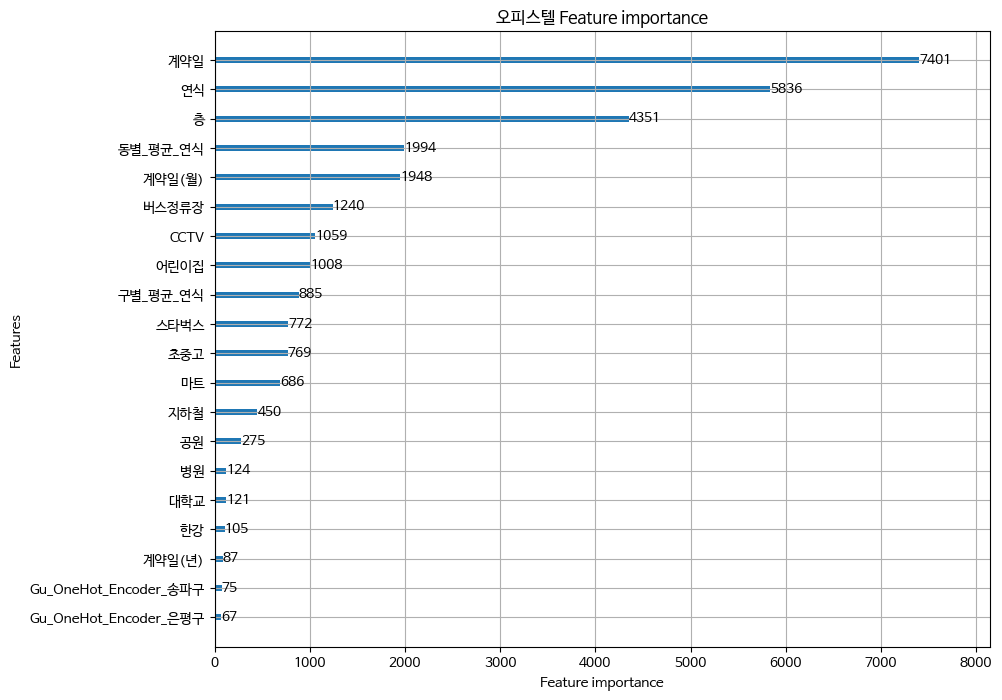

In [ ]:
model_best = LGBMRegressor(n_estimators=1000,
                          learning_rate=0.3,
                          lambda_l1=10,
                          lambda_l2=30,
                          max_depth=20,
                          subsample=0.6,
                          random_state=11)
model_best.fit(X_train, y_train)

lgb.plot_importance(model_best, figsize=(10, 8), max_num_features=20, title='오피스텔 Feature importance')
plt.show()

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Mean Absolute Error: 255.61742246514842
Mean Squared Error: 168807.8956204145
Root Mean Squared Error: 410.8623803908244
Mean Squared Log Error: 0.02864824402756886
R Squared: 0.7224595188478342
Mean Absolute Percentage Error: 11.93749713587578
Mean Percentage Error: -3.1204666131539645
              실제값          예측값
동                             
가락동   1913.198896  2004.003874
가리봉동  1523.156946  1579.209291
가산동   2515.949944  2498.484378
가양동   2432.400931  2403.963328
갈월동   1905.860095  2047.584928
...           ...          ...
회기동   2028.538796  1881.092621
효제동   2919.192027  3029.971021
후암동   1487.783595  1284.704130
휘경동   3055.908842  3126.885086
흥인동   2

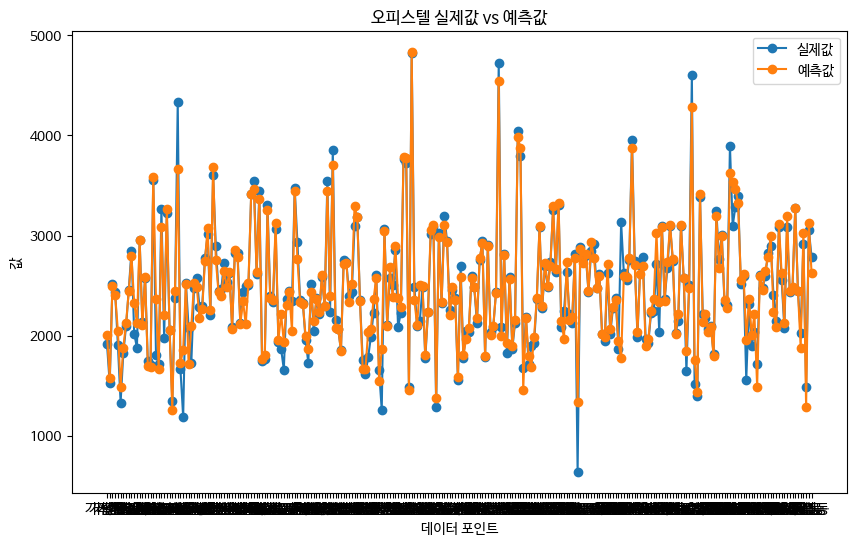

In [ ]:
# 학습된 모델을 사용하여 예측
y_pred = model_best.predict(X_test)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'R Squared: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 예측값과 실제값 비교하는 선 그래프
plt.figure(figsize=(10, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('오피스텔 실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()

# 아파트

## 건물용도 필터링

In [ ]:
df_apt = df.loc[df['Type_OneHot_Encoder_아파트']==1]
df_apt.drop(['Type_OneHot_Encoder_단독다가구', 'Type_OneHot_Encoder_아파트', 'Type_OneHot_Encoder_연립다세대', 'Type_OneHot_Encoder_오피스텔'], axis=1, inplace=True)
df_apt

,연식,동별 평균 연식,구별 평균 연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,...,Gu_OneHot_Encoder_성북구,Gu_OneHot_Encoder_송파구,Gu_OneHot_Encoder_양천구,Gu_OneHot_Encoder_영등포구,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,평당전세가
동,,,,,,,,,,,,,,,,,,,,,
원효로2가,50.0,13.940659,20.914235,2.0,20200609.0,2020,6,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1425.691244
원효로2가,50.0,13.940659,20.914235,7.0,20200717.0,2020,7,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,639.844886
원효로2가,50.0,13.940659,20.914235,6.0,20200715.0,2020,7,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1302.530764
원효로2가,50.0,13.940659,20.914235,5.0,20200724.0,2020,7,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,713.050994
원효로2가,50.0,13.940659,20.914235,4.0,20200317.0,2020,3,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,935.904708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
번동,22.0,22.724690,19.539600,14.0,20221227.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1288.431071
번동,31.0,22.724690,19.539600,15.0,20221228.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1330.585877
번동,19.0,22.724690,19.539600,8.0,20221230.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1426.326130


## LGBM

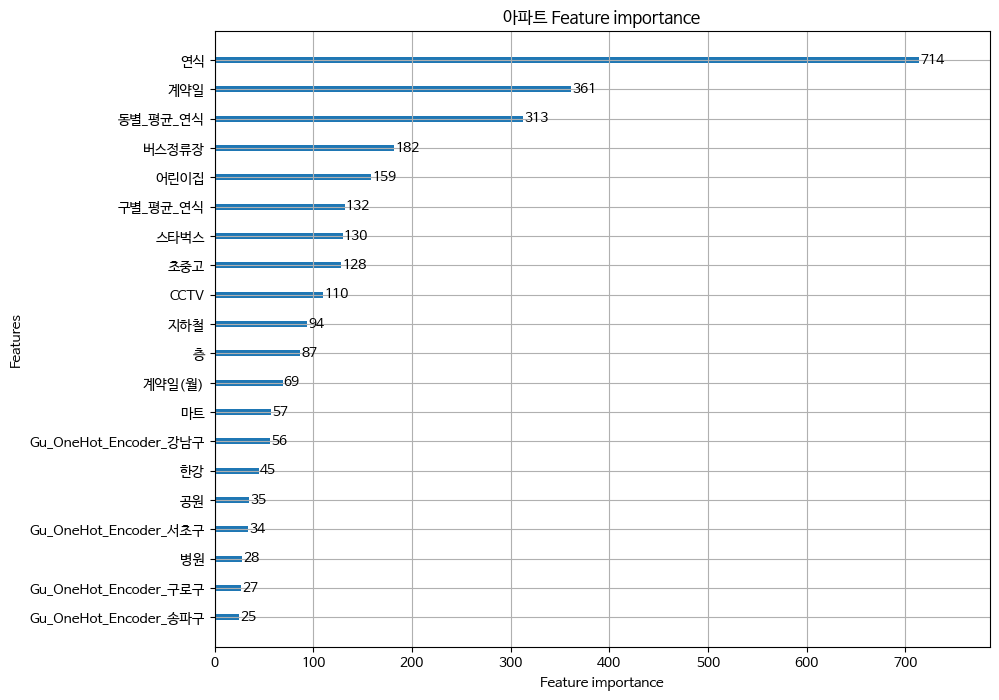

In [ ]:
from lightgbm import LGBMRegressor
import lightgbm as lgb

X_features = df_apt.iloc[:, :-1]
y_label = df_apt.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

model = LGBMRegressor(max_depth=10, random_state=11, verbose=-1)
model.fit(X_train, y_train)

lgb.plot_importance(model, figsize=(10, 8), max_num_features=20, title='아파트 Feature importance')
plt.show()

Mean Absolute Error: 475.24330454648657
Mean Squared Error: 436786.5472926781
Root Mean Squared Error: 660.8982881598938
Mean Squared Log Error: 0.1332391665862056
R Squared: 0.651130857986439
Mean Absolute Percentage Error: 31.324396296922185
Mean Percentage Error: -15.663841591183642
              실제값          예측값
동                             
가락동   2957.228056  2904.737352
가리봉동  1482.639273  1882.182909
가산동   2690.524099  2742.570015
가양동   1740.341186  1747.590353
갈현동   2186.019732  2080.967255
...           ...          ...
효창동   2883.212703  2737.444688
후암동   1503.115144  1609.438962
휘경동   1900.889326  2060.944568
흑석동   2550.235440  2622.765993
흥인동   3389.631883  3675.531915

[325 rows x 2 columns]


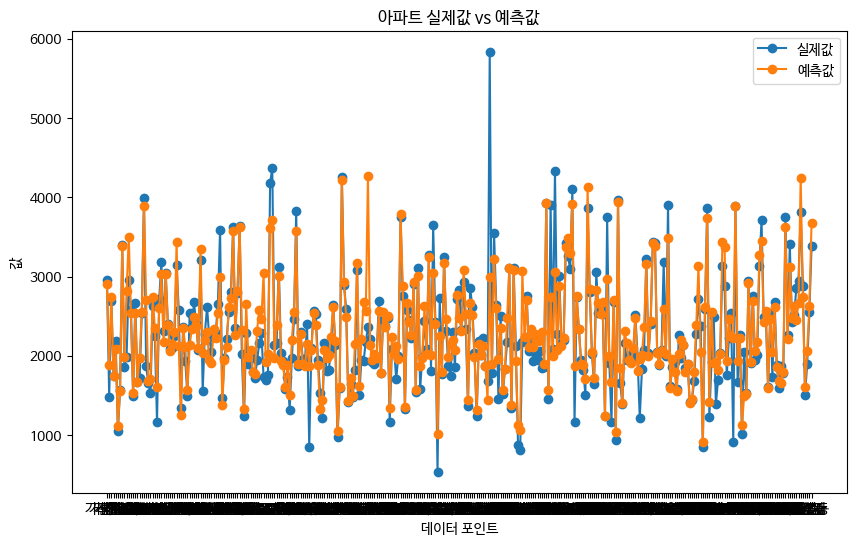

In [ ]:
# 아파트
# LightGBM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

# 학습된 모델을 사용하여 예측
y_pred = model.predict(X_test)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'R Squared: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 예측값과 실제값 비교하는 선 그래프
plt.figure(figsize=(10, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('아파트 실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()

## 하이퍼파라미터 튜닝

In [ ]:
# # RandomizedSearchCV
# from sklearn.model_selection import RandomizedSearchCV

# params = {
#     'n_estimators' : [100, 500 , 1000] , # 반복 횟수
#     'learning_rate' : [0.01 , 0.05 , 0.1 , 0.3] , # 러닝 메이트
#     'lambda_l1' : [0 , 10 , 20 , 30 ,50] , # L1 정규화
#     'lambda_l2' : [0 , 10 , 20 , 30 , 50] , # L2 정규화
#     'max_depth' : [5 , 10 , 15 , 20] , # 최대 깊이
#     'subsample' : [0.6 , 0.8 , 1] # 서브샘플 비율
# }

# model_2 = LGBMRegressor(random_state= 11) # 모델 객체 생성
# rs = RandomizedSearchCV(model_2 , param_distributions= params , n_iter= 30, random_state= 11 , n_jobs= -1) # 랜덤 그리드 서치 객체 생성
# rs.fit(X_train , y_train)
# rs.best_params_

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.092410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

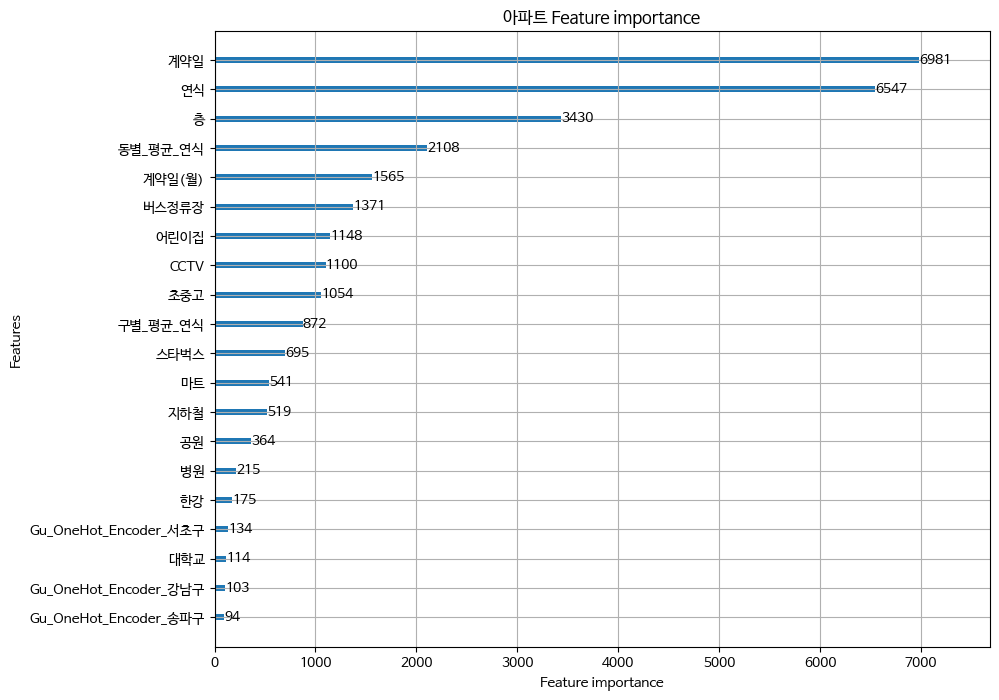

In [ ]:
# 아파트
model_best = LGBMRegressor(n_estimators=1000,
                          learning_rate=0.3,
                          lambda_l1=10,
                          lambda_l2=30,
                          max_depth=20,
                          subsample=0.6,
                          random_state=11)
model_best.fit(X_train, y_train)

lgb.plot_importance(model_best, figsize=(10, 8), max_num_features=20, title='아파트 Feature importance')
plt.show()

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Mean Absolute Error: 406.4201283835774
Mean Squared Error: 335346.6258404827
Root Mean Squared Error: 579.0912068409282
Mean Squared Log Error: 0.10089832686410491
R Squared: 0.7321527177078582
Mean Absolute Percentage Error: 25.629154393262127
Mean Percentage Error: -11.521935679710351
              실제값          예측값
동                             
가락동   2957.228056  2934.797921
가리봉동  1482.639273  1427.819083
가산동   2690.524099  2725.599968
가양동   1740.341186  1732.264432
갈현동   2186.019732  2172.740778
...           ...          ...
효창동   2883.212703  2804.458223
후암동   1503.115144  1487.589378
휘경동   1900.889326  1936.462128
흑석동   2550.235440  2595.965052
흥인동   3

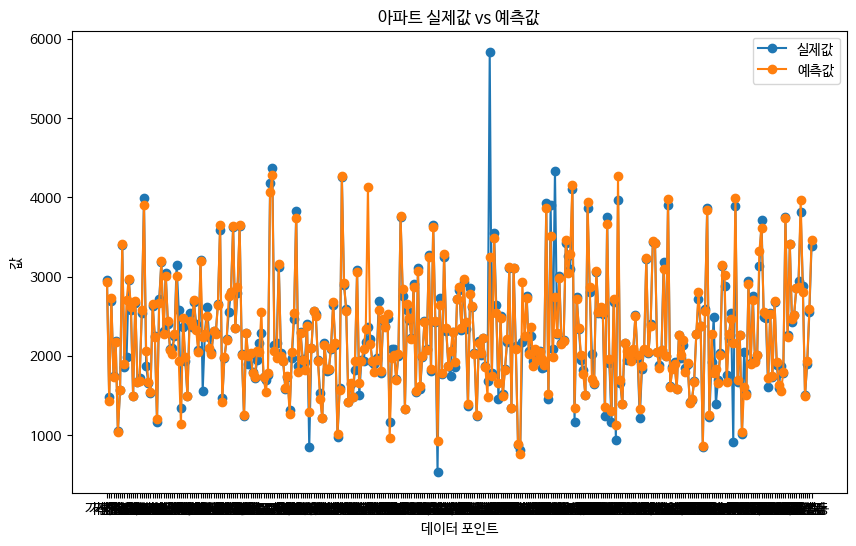

In [ ]:
# 학습된 모델을 사용하여 예측
y_pred = model_best.predict(X_test)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'R Squared: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 예측값과 실제값 비교하는 선 그래프
plt.figure(figsize=(10, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('아파트 실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()

## 오차가 가장 큰 데이터

In [ ]:
compare_df
compare_df.loc[abs(compare_df['실제값']-compare_df['예측값']) == max(abs(compare_df['실제값']-compare_df['예측값']))]

,실제값,예측값
동,,
신문로2가,5837.040257,2994.202807


In [ ]:
df.loc['신문로2가']

,연식,동별 평균 연식,구별 평균 연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,...,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,Type_OneHot_Encoder_단독다가구,Type_OneHot_Encoder_아파트,Type_OneHot_Encoder_연립다세대,Type_OneHot_Encoder_오피스텔,평당전세가
동,,,,,,,,,,,,,,,,,,,,,
신문로2가,0.0,15.038835,19.36861,2.0,20201015.0,2020,10,1.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4520.547945
신문로2가,0.0,15.038835,19.36861,6.0,20201008.0,2020,10,1.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3856.641995
신문로2가,0.0,15.038835,19.36861,6.0,20200929.0,2020,9,1.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3867.906977
신문로2가,0.0,15.038835,19.36861,5.0,20201021.0,2020,10,1.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4297.674419
신문로2가,0.0,15.038835,19.36861,4.0,20201014.0,2020,10,1.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4667.609618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
신문로2가,0.0,15.038835,19.36861,3.0,20221109.0,2022,11,1.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3449.176901
신문로2가,37.0,15.038835,19.36861,1.0,20221120.0,2022,11,1.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,969.362069
신문로2가,24.0,15.038835,19.36861,4.0,20221124.0,2022,11,1.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2597.336240


# 단독다가구

## 건물용도 필터링

In [ ]:
df_single = df.loc[df['Type_OneHot_Encoder_단독다가구']==1]
df_single.drop(['Type_OneHot_Encoder_단독다가구', 'Type_OneHot_Encoder_아파트', 'Type_OneHot_Encoder_연립다세대', 'Type_OneHot_Encoder_오피스텔'], axis=1, inplace=True)
df_single

,연식,동별 평균 연식,구별 평균 연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,...,Gu_OneHot_Encoder_성북구,Gu_OneHot_Encoder_송파구,Gu_OneHot_Encoder_양천구,Gu_OneHot_Encoder_영등포구,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,평당전세가
동,,,,,,,,,,,,,,,,,,,,,
원효로2가,52.0,13.940659,20.914235,1.0,20200723.0,2020,7,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1684.701190
원효로2가,82.0,13.940659,20.914235,1.0,20200102.0,2020,1,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1248.108926
원효로2가,65.0,13.940659,20.914235,1.0,20200519.0,2020,5,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2061.241428
원효로2가,27.0,13.940659,20.914235,1.0,20200925.0,2020,9,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,885.906040
원효로2가,28.0,13.940659,20.914235,1.0,20200725.0,2020,7,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2002.044062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
번동,35.0,22.724690,19.539600,1.0,20221215.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1176.815951
번동,29.0,22.724690,19.539600,1.0,20221216.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737.188920
번동,28.0,22.724690,19.539600,1.0,20221217.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,330.000000


## LGBM

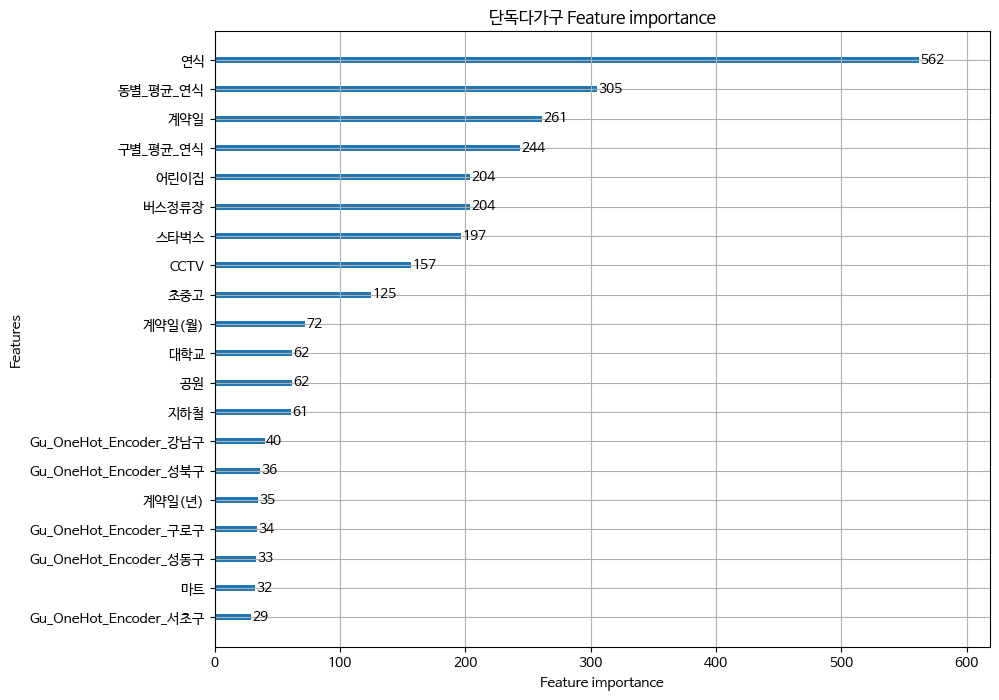

In [ ]:
from lightgbm import LGBMRegressor
import lightgbm as lgb

X_features = df_single.iloc[:, :-1]
y_label = df_single.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

model = LGBMRegressor(max_depth=10, random_state=11, verbose=-1)
model.fit(X_train, y_train)

lgb.plot_importance(model, figsize=(10, 8), max_num_features=20, title='단독다가구 Feature importance')
plt.show()

Mean Absolute Error: 365.2202744763204
Mean Squared Error: 245453.1405910937
Root Mean Squared Error: 495.4322764930578
Mean Squared Log Error: 0.17673767937400653
R Squared: 0.44078432873909834
Mean Absolute Percentage Error: 38.333281594017926
Mean Percentage Error: -19.962327370128392
              실제값          예측값
동                             
가락동   1355.026463  1350.138535
가리봉동  1592.037918  1582.973295
가산동   1615.189899  1566.094485
가양동   1545.331495  1322.439064
가회동   1535.405834  1421.820018
...           ...          ...
효창동   1394.239655  1368.215005
후암동   1248.229947  1224.936102
휘경동   1649.695500  1569.635280
흑석동   1749.273757  1657.521010
흥인동   3031.658502  1641.740240

[357 rows x 2 columns]


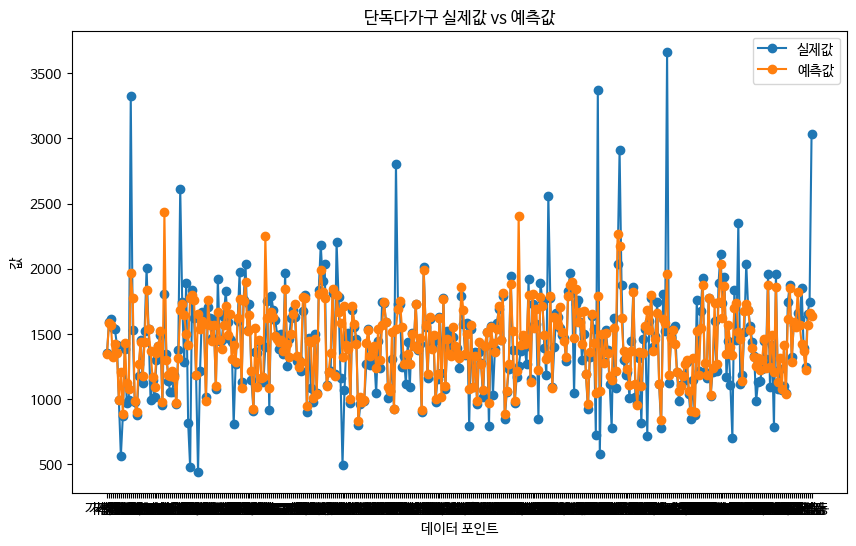

In [ ]:
# LightGBM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

# 학습된 모델을 사용하여 예측
y_pred = model.predict(X_test)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'R Squared: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 예측값과 실제값 비교하는 선 그래프
plt.figure(figsize=(10, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('단독다가구 실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()

## 하이퍼파라미터 튜닝

In [ ]:
# # RandomizedSearchCV
# from sklearn.model_selection import RandomizedSearchCV

# params = {
#     'n_estimators' : [100, 500 , 1000] , # 반복 횟수
#     'learning_rate' : [0.01 , 0.05 , 0.1 , 0.3] , # 러닝 메이트
#     'lambda_l1' : [0 , 10 , 20 , 30 ,50] , # L1 정규화
#     'lambda_l2' : [0 , 10 , 20 , 30 , 50] , # L2 정규화
#     'max_depth' : [5 , 10 , 15 , 20] , # 최대 깊이
#     'subsample' : [0.6 , 0.8 , 1] # 서브샘플 비율
# }

# model_2 = LGBMRegressor(random_state= 11) # 모델 객체 생성
# rs = RandomizedSearchCV(model_2 , param_distributions= params , n_iter= 30, random_state= 11 , n_jobs= -1) # 랜덤 그리드 서치 객체 생성
# rs.fit(X_train , y_train)
# rs.best_params_

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

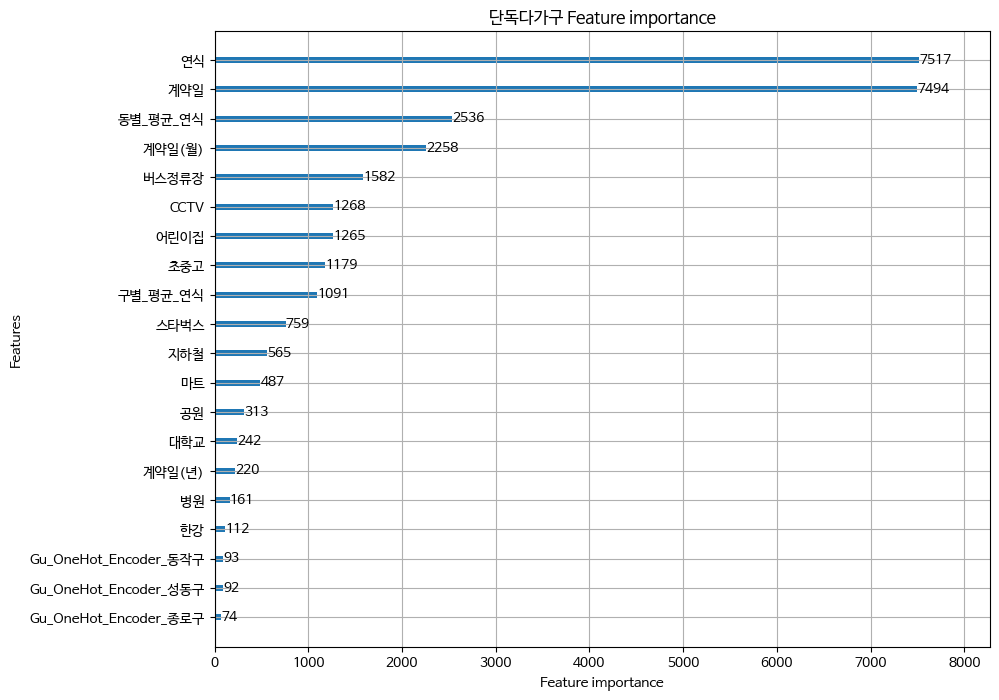

In [ ]:
model_best = LGBMRegressor(n_estimators=1000,
                          learning_rate=0.3,
                          lambda_l1=10,
                          lambda_l2=30,
                          max_depth=20,
                          subsample=0.6,
                          random_state=11)
model_best.fit(X_train, y_train)

lgb.plot_importance(model_best, figsize=(10, 8), max_num_features=20, title='단독다가구 Feature importance')
plt.show()

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Mean Absolute Error: 362.2125806424809
Mean Squared Error: 242750.60614546546
Root Mean Squared Error: 492.6972763730945
Mean Squared Log Error: 0.17498976037778113
R Squared: 0.44694151055587295
Mean Absolute Percentage Error: 37.90355745125644
Mean Percentage Error: -19.341742549856107
              실제값          예측값
동                             
가락동   1355.026463  1396.658952
가리봉동  1592.037918  1580.101090
가산동   1615.189899  1580.034609
가양동   1545.331495  1533.556627
가회동   1535.405834  1563.815009
...           ...          ...
효창동   1394.239655  1433.383248
후암동   1248.229947  1251.593130
휘경동   1649.695500  1606.852614
흑석동   1749.273757  1703.154731
흥인동   

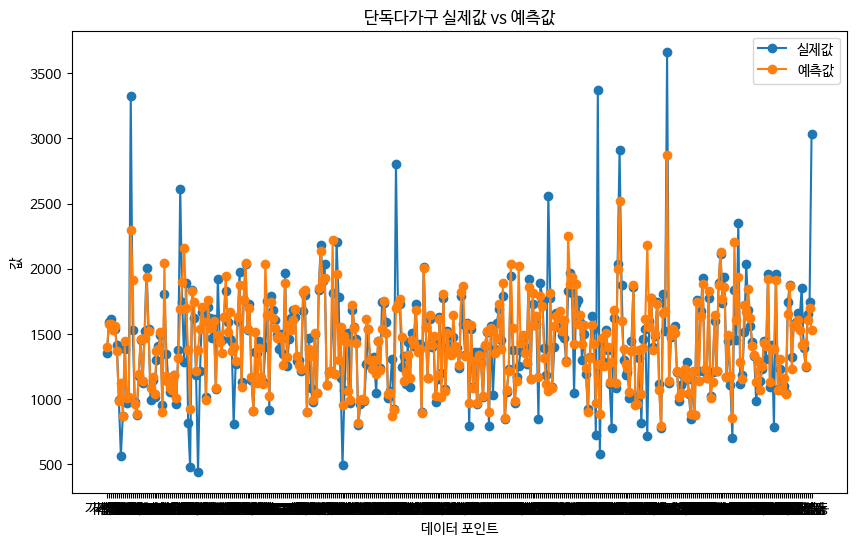

In [ ]:
# 학습된 모델을 사용하여 예측
y_pred = model_best.predict(X_test)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'R Squared: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 예측값과 실제값 비교하는 선 그래프
plt.figure(figsize=(10, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('단독다가구 실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()

# 연립다세대

## 건물용도 필터링

In [ ]:
df_multi = df.loc[df['Type_OneHot_Encoder_연립다세대']==1]
df_multi.drop(['Type_OneHot_Encoder_단독다가구', 'Type_OneHot_Encoder_아파트', 'Type_OneHot_Encoder_연립다세대', 'Type_OneHot_Encoder_오피스텔'], axis=1, inplace=True)
df_multi

,연식,동별 평균 연식,구별 평균 연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,...,Gu_OneHot_Encoder_성북구,Gu_OneHot_Encoder_송파구,Gu_OneHot_Encoder_양천구,Gu_OneHot_Encoder_영등포구,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,평당전세가
동,,,,,,,,,,,,,,,,,,,,,
원효로2가,12.0,13.940659,20.914235,3.0,20200921.0,2020,9,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1396.825397
원효로2가,1.0,13.940659,20.914235,5.0,20200225.0,2020,2,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2997.981157
원효로2가,1.0,13.940659,20.914235,4.0,20200210.0,2020,2,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3031.062124
원효로2가,2.0,13.940659,20.914235,5.0,20200111.0,2020,1,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1902.358898
원효로2가,2.0,13.940659,20.914235,4.0,20200501.0,2020,5,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3063.152699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
번동,35.0,22.724690,19.539600,3.0,20221219.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1068.249258
번동,10.0,22.724690,19.539600,4.0,20221223.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3704.392560
번동,33.0,22.724690,19.539600,2.0,20221225.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,709.459459


## LGBM

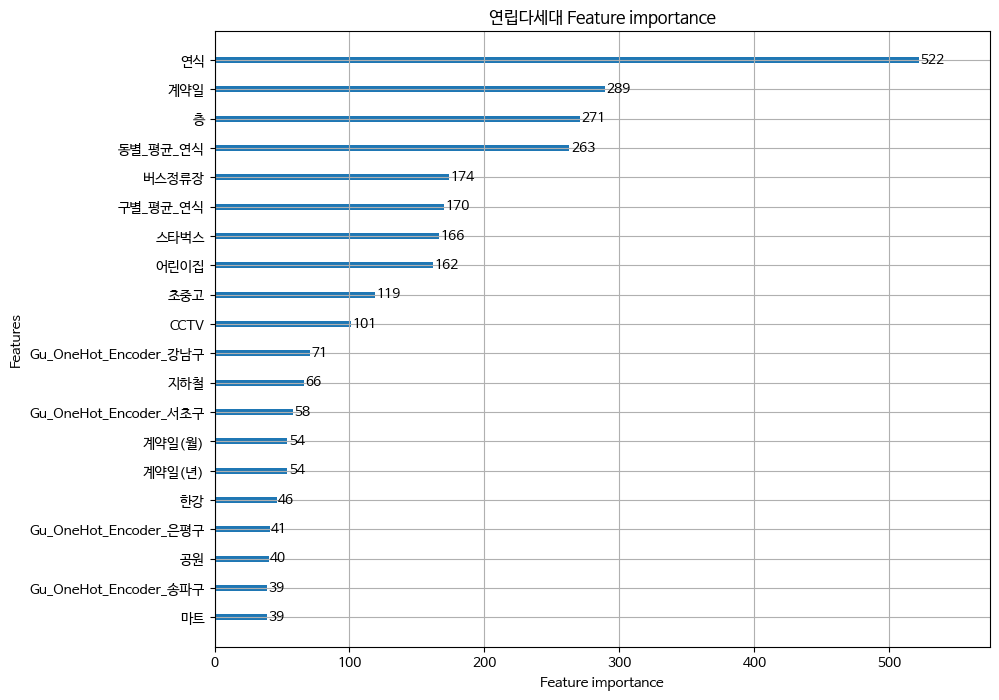

In [ ]:
from lightgbm import LGBMRegressor
import lightgbm as lgb

X_features = df_multi.iloc[:, :-1]
y_label = df_multi.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

model = LGBMRegressor(max_depth=10, random_state=11, verbose=-1)
model.fit(X_train, y_train)

lgb.plot_importance(model, figsize=(10, 8), max_num_features=20, title='연립다세대 Feature importance')
plt.show()

Mean Absolute Error: 407.86719018070755
Mean Squared Error: 352139.21250331786
Root Mean Squared Error: 593.4131886833304
Mean Squared Log Error: 0.1165942880903794
R Squared: 0.6480165514286106
Mean Absolute Percentage Error: 28.661476098477518
Mean Percentage Error: -13.598447790534104
              실제값          예측값
동                             
가락동   2140.711978  2126.307295
가리봉동  1959.022764  2020.964491
가산동   2440.507577  2379.802529
가양동   2215.356057  2203.599287
가회동   2021.248554  1443.749885
...           ...          ...
효자동   2135.148060  2340.961809
효창동   2406.788171  2349.459695
후암동   2073.275678  2055.556853
휘경동   2097.681246  1963.756330
흑석동   1708.213587  1819.395816

[330 rows x 2 columns]


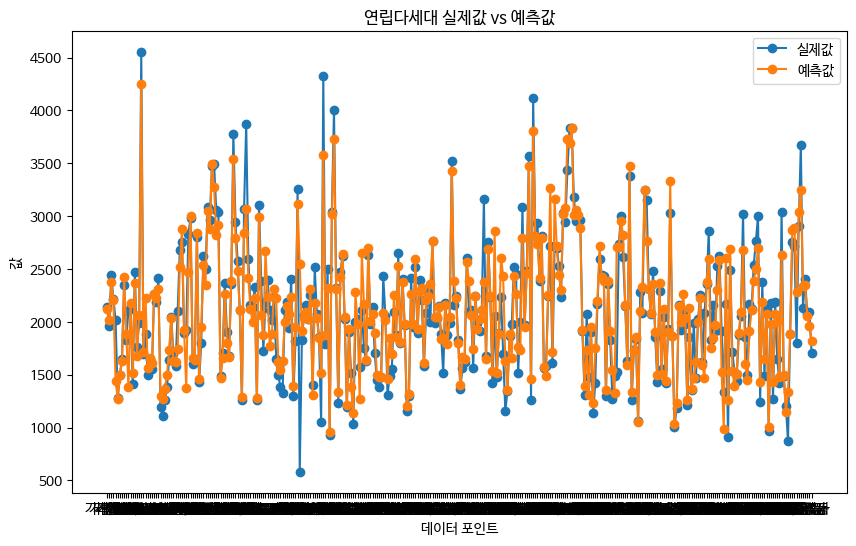

In [ ]:
# LightGBM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

# 학습된 모델을 사용하여 예측
y_pred = model.predict(X_test)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'R Squared: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 예측값과 실제값 비교하는 선 그래프
plt.figure(figsize=(10, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('연립다세대 실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()

## 하이퍼파라미터 튜닝

In [ ]:
# # RandomizedSearchCV
# from sklearn.model_selection import RandomizedSearchCV

# params = {
#     'n_estimators' : [100, 500 , 1000] , # 반복 횟수
#     'learning_rate' : [0.01 , 0.05 , 0.1 , 0.3] , # 러닝 메이트
#     'lambda_l1' : [0 , 10 , 20 , 30 ,50] , # L1 정규화
#     'lambda_l2' : [0 , 10 , 20 , 30 , 50] , # L2 정규화
#     'max_depth' : [5 , 10 , 15 , 20] , # 최대 깊이
#     'subsample' : [0.6 , 0.8 , 1] # 서브샘플 비율
# }

# model_2 = LGBMRegressor(random_state= 11) # 모델 객체 생성
# rs = RandomizedSearchCV(model_2 , param_distributions= params , n_iter= 30, random_state= 11 , n_jobs= -1) # 랜덤 그리드 서치 객체 생성
# rs.fit(X_train , y_train)
# rs.best_params_

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062944 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 978
[LightGBM] [Info] Number of data points in the train set: 2

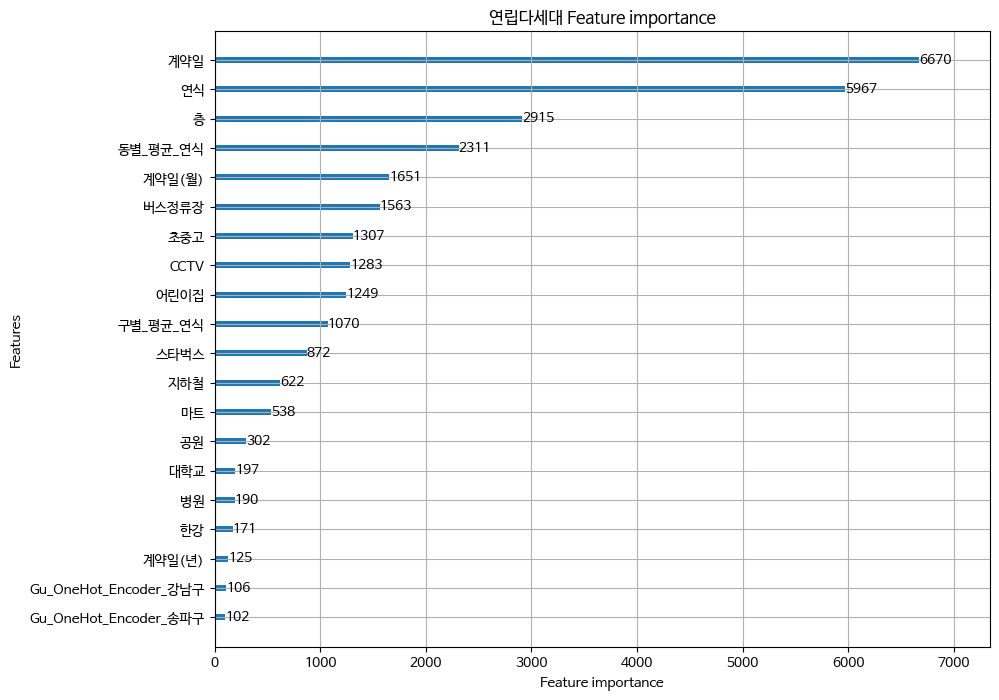

In [ ]:
model_best = LGBMRegressor(n_estimators=1000,
                          learning_rate=0.3,
                          lambda_l1=10,
                          lambda_l2=30,
                          max_depth=20,
                          subsample=0.6,
                          random_state=11)
model_best.fit(X_train, y_train)

lgb.plot_importance(model_best, figsize=(10, 8), max_num_features=20, title='연립다세대 Feature importance')
plt.show()

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Mean Absolute Error: 387.92577123891454
Mean Squared Error: 320135.96290803415
Root Mean Squared Error: 565.8055875546248
Mean Squared Log Error: 0.10711323090317769
R Squared: 0.6800056448270992
Mean Absolute Percentage Error: 27.014409961814962
Mean Percentage Error: -12.141825971941868
              실제값          예측값
동                             
가락동   2140.711978  2111.278963
가리봉동  1959.022764  1918.814405
가산동   2440.507577  2390.199175
가양동   2215.356057  2154.722161
가회동   2021.248554  1968.561865
...           ...          ...
효자동   2135.148060  2366.868289
효창동   2406.788171  2419.548149
후암동   2073.275678  2065.769182
휘경동   2097.681246  2049.339151
흑석동  

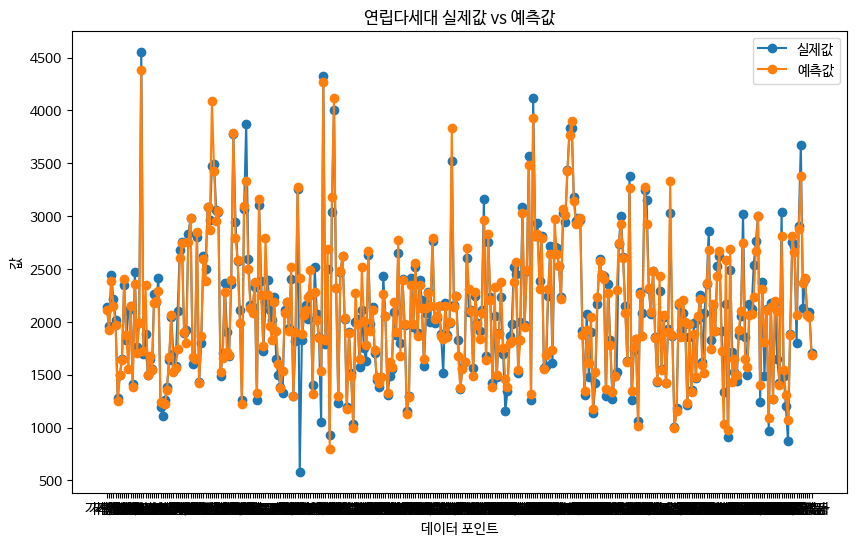

In [ ]:
# 학습된 모델을 사용하여 예측
y_pred = model_best.predict(X_test)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'R Squared: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 예측값과 실제값 비교하는 선 그래프
plt.figure(figsize=(10, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('연립다세대 실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()